In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import glob
from radioReduction import *
from astropy.stats import LombScargle
from scipy import optimize
from scipy.interpolate import make_interp_spline, BSpline


In [78]:
'''
Gathering the data
'''
# Reading all the average flux densities data tbales
dir = '1314/'
folder = glob.glob('1314/*-LLRR.dat')

# reading in the data tables
dt = []
for i in range(len(folder)):
    dt.append(pd.read_table(folder[i]))

# Calculating the means and uncert
mjd,re,ure = [],[],[]

for i in range(len(dt)):
        m,f,e = meanData(dt[i])
        mjd.append(m)
        re.append(f)
        ure.append(e)
longTerm = pd.DataFrame(data={'mjd':mjd,'re':re,'ure':ure})
longTerm = longTerm.sort_values(by='mjd')

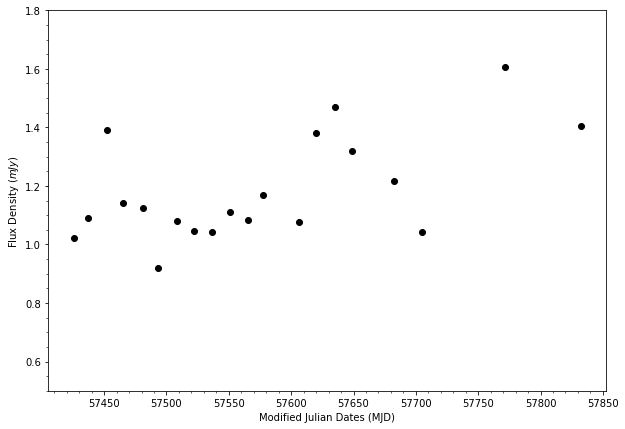

In [81]:
plt.figure(figsize=(10,7))
plt.scatter(longTerm['mjd'],longTerm['re'],marker='o',color='black')
plt.errorbar(longTerm['mjd'],longTerm['re'],yerr=longTerm['ure'],color='black',linestyle='None',label='_nolegend_')
plt.ylim(0.5,1.8)
plt.minorticks_on()
plt.ylabel('Flux Density ($mJy$)')
plt.xlabel('Modified Julian Dates (MJD)')
plt.savefig('plots/1314LongTerm.png')
plt.show()


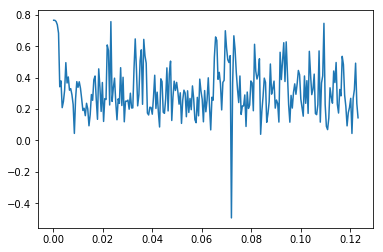

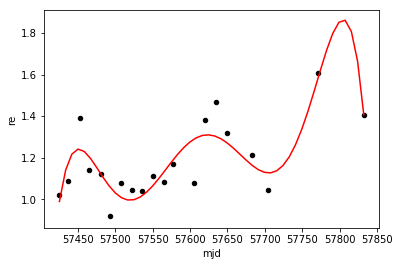

4067.8833140379725


In [75]:
freq, power = LombScargle(longTerm['mjd'],longTerm['re'],longTerm['ure'],nterms=3).autopower()
plt.plot(freq,power)
plt.show()
best_freq = freq[np.argmax(power)]
x_fit = np.linspace(np.min(longTerm['mjd']),np.max(longTerm['mjd']))
y_fit = LombScargle(longTerm['mjd'],longTerm['re'],longTerm['ure'],nterms=3).model(x_fit,best_freq)

longTerm.plot.scatter('mjd','re',yerr='ure',color='black')
plt.plot(x_fit,y_fit,color='red')
plt.show()

print(1/best_freq)

## Looking at SED

In [25]:
dt = pd.read_table('2m1314_data_table.txt',sep=' ')

In [44]:
low = pd.DataFrame(data={'mjd':dt['MJD'],'re':dt['5 GHz Flux ($\\m Jy$)'],'ure':dt['5 GHz err ($\\m Jy$)']})
high = pd.DataFrame(data={'mjd':dt['MJD'],'re':dt['7 GHz Flux ($\\m Jy$)'],'ure':dt['7 GHz err ($\\m Jy$)']})
ratio = high['re']/low['re']

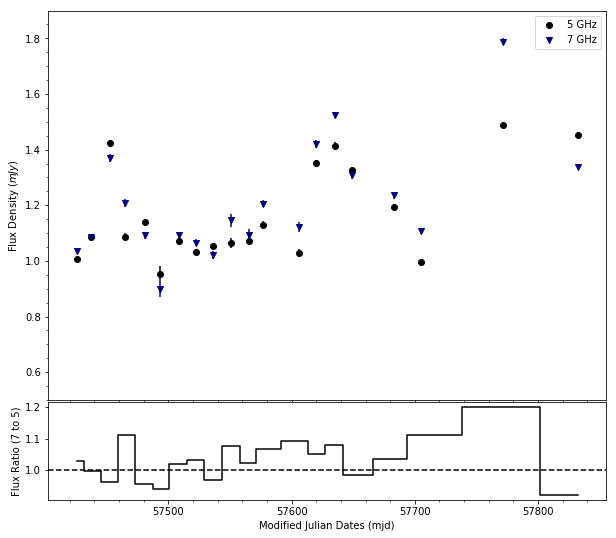

In [84]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,9),gridspec_kw = {'hspace':.01,'height_ratios':[4,1]},sharex=True)
ax[0].scatter(low['mjd'],low['re'],color='k',marker='o',label='5 GHz')
ax[0].errorbar(low['mjd'],low['re'],yerr=low['ure'],color='k',linestyle='None',label='_nolegend_')
ax[0].scatter(high['mjd'],high['re'],color='navy',marker='v',label='7 GHz')
ax[0].errorbar(high['mjd'],high['re'],yerr=high['ure'],color='navy',linestyle='None',label='_nolegend_')
ax[0].legend(loc='best')
ax[0].set_ylabel('Flux Density ($mJy$)')
ax[0].set_ylim(0.5,1.9)
ax[0].minorticks_on()

ax[1].plot(low['mjd'],ratio,color='black',drawstyle='steps-mid')
ax[1].axhline(y=1,color='k',linestyle='dashed')
ax[1].set_ylabel('Flux Ratio (7 to 5)')
plt.xlabel('Modified Julian Dates (mjd)')
plt.savefig('plots/SED_1314.png')
plt.show()